<a href="https://colab.research.google.com/github/Sudo343/Foundations-of-ML-MA722/blob/main/a1%20q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("e1071")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
library(e1071)
library(caret)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


working on admission data

In [6]:
admission_data=read.csv("/content/admission_data.csv")
str(admission_data)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [7]:
admission_data$admit[admission_data$admit ==0] <-'No'
admission_data$admit[admission_data$admit ==1] <-'Yes'
str(admission_data)

'data.frame':	400 obs. of  4 variables:
 $ admit: chr  "No" "Yes" "Yes" "Yes" ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [8]:
admission_data$rank=factor(admission_data$rank)
admission_data$admit=factor(admission_data$admit)
str(admission_data)

'data.frame':	400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "No","Yes": 1 2 2 2 1 2 2 1 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...


In [9]:
#Data partitioning
data_part = sample(2, nrow(admission_data), replace = T, prob=c(0.8,0.2))
train_data=admission_data[data_part==1,]
test_data=admission_data[data_part==2,]

#Model training
nb=naiveBayes(admit~.,data = train_data)
nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       No       Yes 
0.6830769 0.3169231 

Conditional probabilities:
     gre
Y         [,1]     [,2]
  No  572.8829 116.5017
  Yes 617.6699 108.4400

     gpa
Y         [,1]      [,2]
  No  3.361126 0.3780554
  Yes 3.470583 0.3658480

     rank
Y             1         2         3         4
  No  0.1126126 0.3468468 0.3423423 0.1981982
  Yes 0.2135922 0.4466019 0.2233010 0.1165049


In [10]:
#Misclassification error on training data
nb_predict=predict(nb,train_data)
tab=table(nb_predict,train_data$admit)
tab

          
nb_predict  No Yes
       No  200  79
       Yes  22  24

missclassification error on training set

In [11]:
1 - sum(diag(tab))/ sum(tab)

[1] 0.3107692

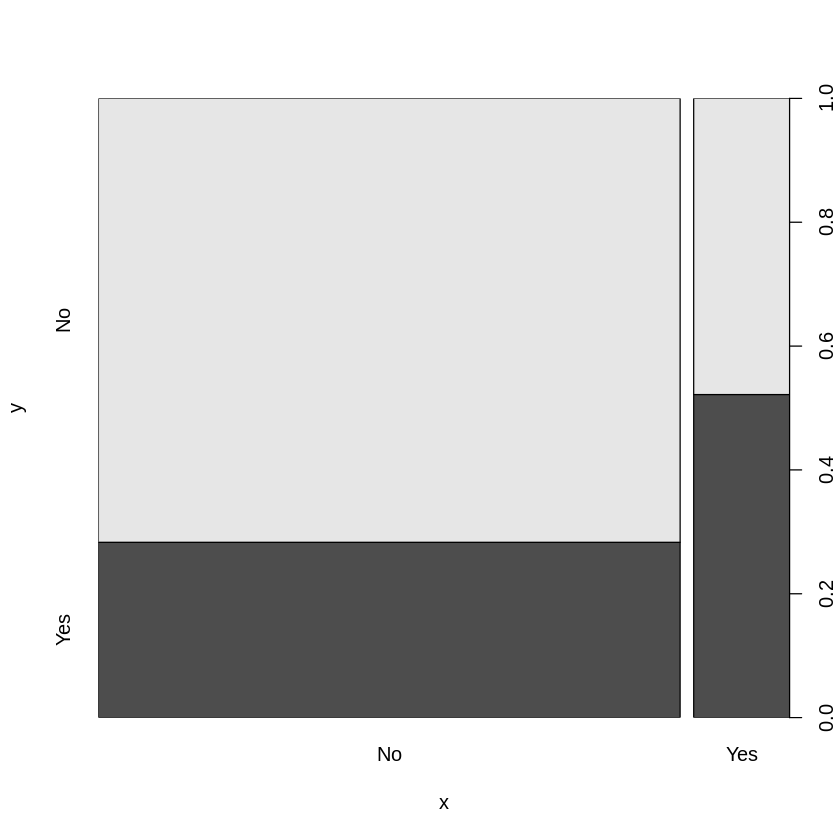

In [12]:
plot(nb_predict,train_data$admit)

In [13]:
#Using confusion matrix function
confusionMatrix(nb_predict,train_data$admit)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  200  79
       Yes  22  24
                                          
               Accuracy : 0.6892          
                 95% CI : (0.6358, 0.7392)
    No Information Rate : 0.6831          
    P-Value [Acc > NIR] : 0.4318          
                                          
                  Kappa : 0.1572          
                                          
 Mcnemar's Test P-Value : 2.515e-08       
                                          
            Sensitivity : 0.9009          
            Specificity : 0.2330          
         Pos Pred Value : 0.7168          
         Neg Pred Value : 0.5217          
             Prevalence : 0.6831          
         Detection Rate : 0.6154          
   Detection Prevalence : 0.8585          
      Balanced Accuracy : 0.5670          
                                          
       'Positive' Class : No              
                              

In [23]:

#CI is the confidence interval that the model accuracy will be between 0.66 to 0.77
#ideal p value should be less than 0.05
#Kappa is checking actual accuracy with random accuracy

#Misclassification error on testing data

nb_predict_test=predict(nb,test_data)
tab2=table(nb_predict_test,test_data$admit)
tab2

               
nb_predict_test No Yes
            No  52  14
            Yes 11  11

missclassification error on testing set

In [24]:
1 - sum(diag(tab2))/ sum(tab2)

[1] 0.2840909

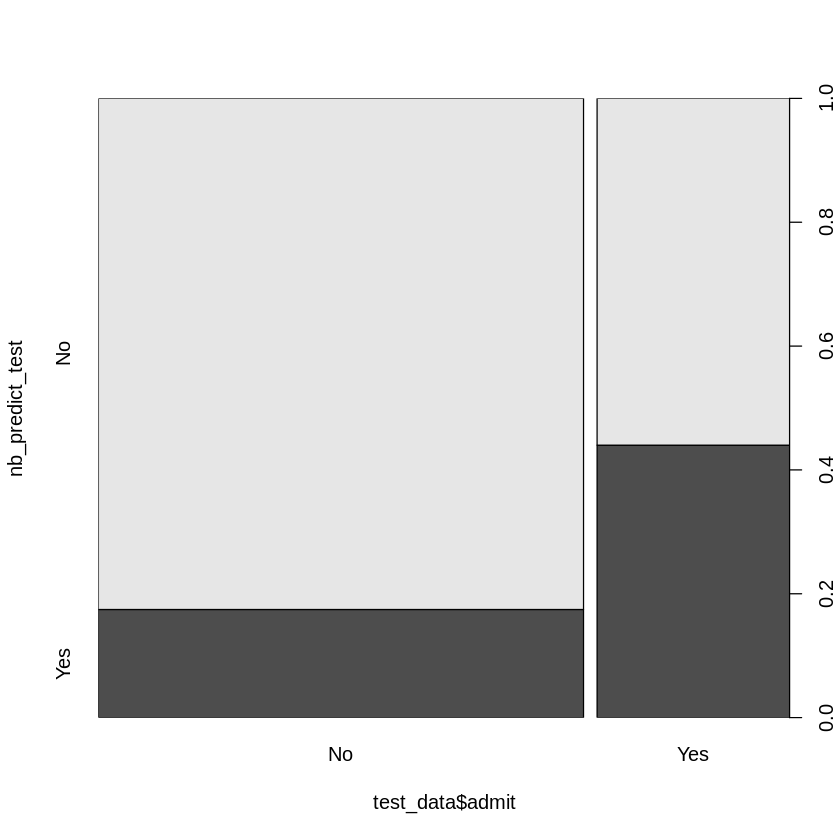

In [25]:
plot(nb_predict_test~test_data$admit)

working on car evaluation set

In [14]:
#Reading data
car_data=read.csv("/content/car_evaluation.csv")
str(car_data)

'data.frame':	1728 obs. of  7 variables:
 $ Cost        : chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ Maintainence: chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ Doors       : chr  "2" "2" "2" "2" ...
 $ persons     : chr  "2" "2" "2" "2" ...
 $ luggage     : chr  "small" "small" "small" "med" ...
 $ safety      : chr  "low" "med" "high" "low" ...
 $ CarClass    : chr  "unaccept" "unaccept" "unaccept" "unaccept" ...


In [16]:
car_data$CarClass[admission_data$CarClass ==0] <-'No'
car_data$CarClass[admission_data$CarClass ==1] <-'Yes'
str(car_data)

'data.frame':	1728 obs. of  7 variables:
 $ Cost        : chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ Maintainence: chr  "vhigh" "vhigh" "vhigh" "vhigh" ...
 $ Doors       : chr  "2" "2" "2" "2" ...
 $ persons     : chr  "2" "2" "2" "2" ...
 $ luggage     : chr  "small" "small" "small" "med" ...
 $ safety      : chr  "low" "med" "high" "low" ...
 $ CarClass    : chr  "unaccept" "unaccept" "unaccept" "unaccept" ...


In [17]:
car_data$Cost=factor(car_data$Cost)
car_data$Maintainence=factor(car_data$Maintainence)
car_data$Doors=factor(car_data$Doors)
car_data$persons=factor(car_data$persons)
car_data$luggage=factor(car_data$luggage)
car_data$safety=factor(car_data$safety)
car_data$CarClass=factor(car_data$CarClass)
str(car_data)

'data.frame':	1728 obs. of  7 variables:
 $ Cost        : Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Maintainence: Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Doors       : Factor w/ 4 levels "2","3","4","5more": 1 1 1 1 1 1 1 1 1 1 ...
 $ persons     : Factor w/ 3 levels "2","4","more": 1 1 1 1 1 1 1 1 1 2 ...
 $ luggage     : Factor w/ 3 levels "big","med","small": 3 3 3 2 2 2 1 1 1 3 ...
 $ safety      : Factor w/ 3 levels "high","low","med": 2 3 1 2 3 1 2 3 1 2 ...
 $ CarClass    : Factor w/ 4 levels "acc","good","unaccept",..: 3 3 3 3 3 3 3 3 3 3 ...


In [26]:
#Data partitioning
data_part = sample(2, nrow(car_data), replace = T, prob=c(0.8,0.2))
train_data=car_data[data_part==1,]
test_data=car_data[data_part==2,]

#Model training
nb=naiveBayes(CarClass~.,data = train_data)
nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       acc       good   unaccept      vgood 
0.22519913 0.04199855 0.69514844 0.03765387 

Conditional probabilities:
          Cost
Y               high       low       med     vhigh
  acc      0.2797428 0.2122186 0.3054662 0.2025723
  good     0.0000000 0.6551724 0.3448276 0.0000000
  unaccept 0.2656250 0.2125000 0.2270833 0.2947917
  vgood    0.0000000 0.5384615 0.4615385 0.0000000

          Maintainence
Y               high       low       med     vhigh
  acc      0.2540193 0.2572347 0.2990354 0.1897106
  good     0.0000000 0.6206897 0.3793103 0.0000000
  unaccept 0.2593750 0.2104167 0.2270833 0.3031250
  vgood    0.1923077 0.4038462 0.4038462 0.0000000

          Doors
Y                  2         3         4     5more
  acc      0.2315113 0.2604502 0.2475884 0.2604502
  good     0.2413793 0.2758621 0.2586207 0.2241379
  unaccept 0.2697917 0.242708

In [27]:
#Misclassification error on training data
nb_predict=predict(nb,train_data)
tab=table(nb_predict,train_data$CarClass)
tab

          
nb_predict acc good unaccept vgood
  acc      230   41       34    21
  good      10   16        1     1
  unaccept  71    0      925     0
  vgood      0    1        0    30

missclassification error on training set

In [28]:
1 - sum(diag(tab))/ sum(tab)

[1] 0.1303403

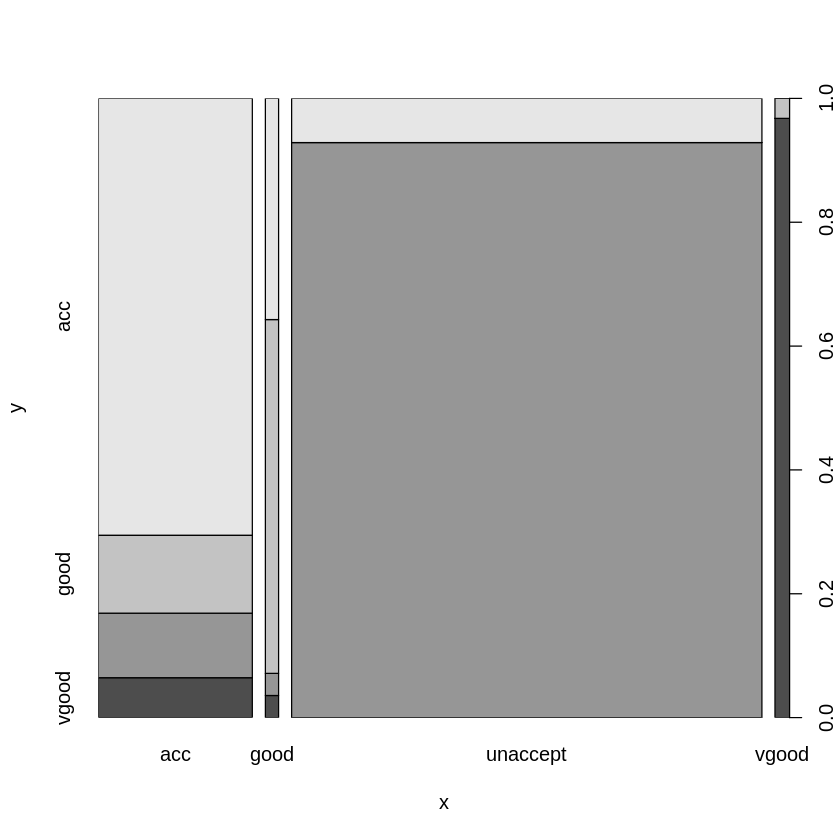

In [30]:
plot(nb_predict,train_data$CarClass)

In [34]:
#Using confusion matrix function
confusionMatrix(nb_predict,train_data$CarClass)

Confusion Matrix and Statistics

          Reference
Prediction acc good unaccept vgood
  acc      230   41       34    21
  good      10   16        1     1
  unaccept  71    0      925     0
  vgood      0    1        0    30

Overall Statistics
                                         
               Accuracy : 0.8697         
                 95% CI : (0.8508, 0.887)
    No Information Rate : 0.6951         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7063         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: acc Class: good Class: unaccept Class: vgood
Sensitivity              0.7395     0.27586          0.9635      0.57692
Specificity              0.9103     0.99093          0.8314      0.99925
Pos Pred Value           0.7055     0.57143          0.9287      0.96774
Neg Pred Value           0.9232     0.96896          0.9091

In [35]:
#CI is the confidence interval that the model accuracy will be between 0.66 to 0.77
#ideal p value should be less than 0.05
#Kappa is checking actual accuracy with random accuracy

#Misclassification error on testing data

nb_predict_test=predict(nb,test_data)
tab2=table(nb_predict_test,test_data$CarClass)
tab2

               
nb_predict_test acc good unaccept vgood
       acc       54    4       13     3
       good       2    7        1     0
       unaccept  17    0      236     0
       vgood      0    0        0    10

missclassification error on testing set

In [36]:
1 - sum(diag(tab2))/ sum(tab2)

[1] 0.1152738

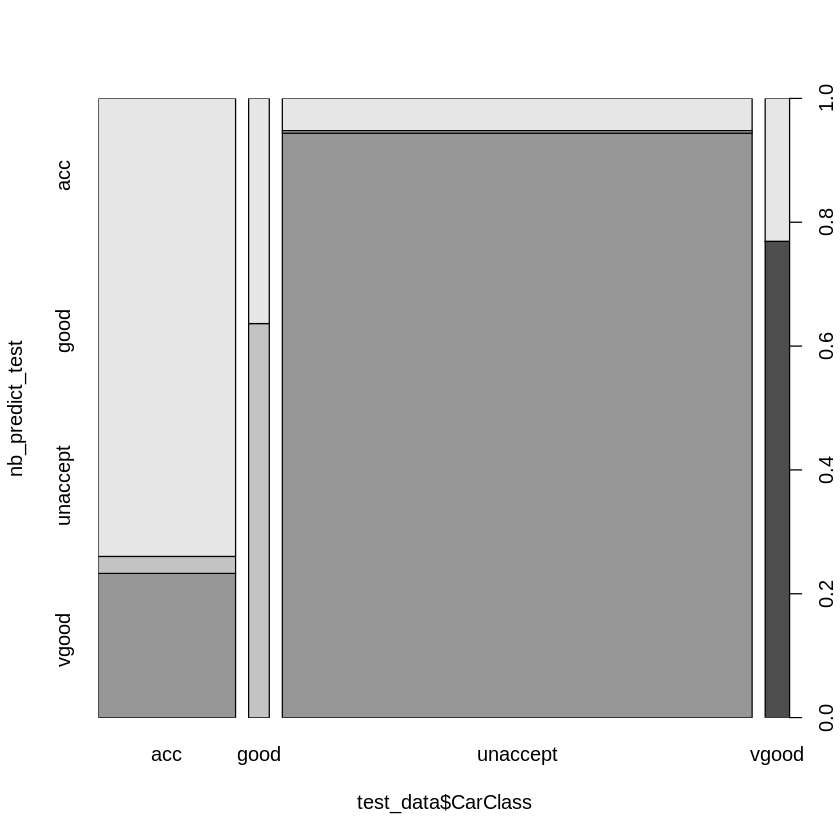

In [37]:
plot(nb_predict_test~test_data$CarClass)